# EDA

박기범 캠퍼님의 간단한 데이터 EDA 게시글을 참고하여 작성했습니다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/opt/ml/input/data/train/train.csv')

In [3]:
train[:10]

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59
5,000007,female,Asian,58,000007_female_Asian_58
6,000008,female,Asian,58,000008_female_Asian_58
7,000009,female,Asian,56,000009_female_Asian_56
8,000010,female,Asian,58,000010_female_Asian_58
9,000012,male,Asian,57,000012_male_Asian_57


Text(0.5, 1.0, 'Age distribution')

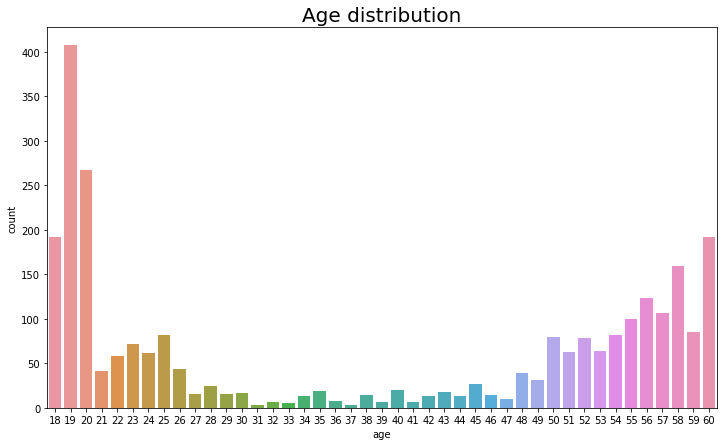

In [4]:
fig = plt.figure(figsize=(12, 7))
ax = sns.countplot(data=train, x='age')

ax.set_title('Age distribution', fontsize=20)

- 비율이 낮은 연령대 : 전체적인 연령대 비율은 30~45세 구간의 데이터 분포가 매우 떨어집니다.
- 비율이 높은 연령대 : 50~60세 구간의 데이터 분포가 가장 높습니다.


### Age range

In [5]:
def get_age_range(age):
    if age < 30:
        return "< 30"
    elif age >= 30 and age < 60:
        return ">= 30 and < 60"
    elif age >= 60:
        return ">= 60"

train['age_range'] = train['age'].apply(lambda x : get_age_range(x))

Text(0.5, 1.0, 'Age_range distribution')

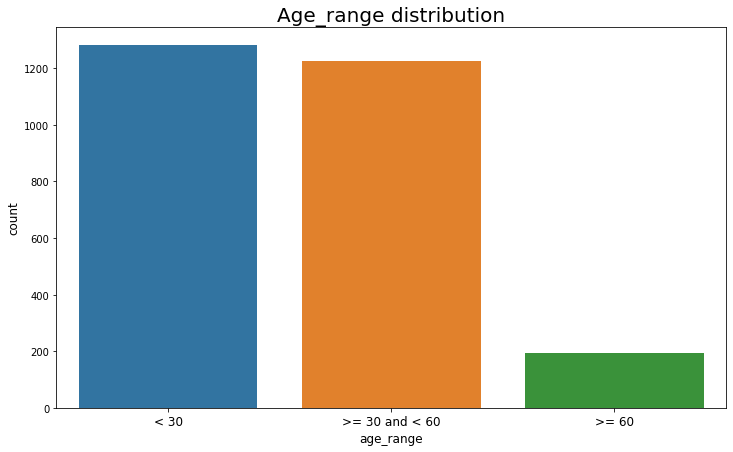

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

g = sns.countplot(data=train, x='age_range', order=['< 30', '>= 30 and < 60', '>= 60'])

ax.set_xticklabels(g.get_xticklabels(), fontsize=12)
ax.set_xlabel(g.get_xlabel(), fontsize=12)
ax.set_ylabel(g.get_ylabel(), fontsize=12)
ax.set_title('Age_range distribution', fontsize=20)


- 클래스로 구분했을 때 50~60세의 비율 덕분에 `>= 30 and < 60` 클래스의 비율은 높은 편입니다.
- dataset의 최고 연령은 60세입니다. 따라서  `>= 60` 클래스의 비율이 가장 낮습니다.

### Gender

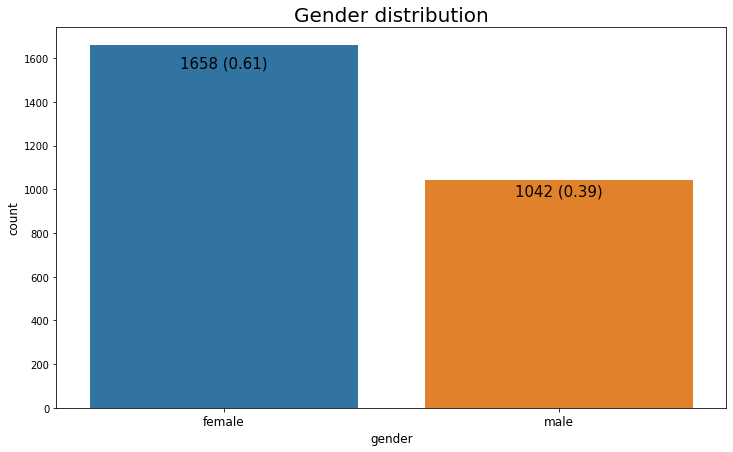

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

g = sns.countplot(data=train, x='gender', ax=ax)

for p in g.patches:
    g.annotate(f"{p.get_height()} ({(p.get_height()/len(train)):.2g})", (p.get_x()+p.get_width()/2., (p.get_height()+0.01)*0.95),
                  ha='center', va='center', fontsize=15)

ax.set_xticklabels(g.get_xticklabels(), fontsize=12)
ax.set_xlabel(g.get_xlabel(), fontsize=12)
ax.set_ylabel(g.get_ylabel(), fontsize=12) 
ax.set_title('Gender distribution', fontsize=20)
plt.show()

성비 : 여자 60%, 남자 40%로 여성의 비율이 약간 높게 나왔습니다.